In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
from scipy.stats import norm, skew, boxcox
from scipy import stats, sparse
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, BayesianRidge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import kagglehub

dont_panic = 42


In [166]:
# Download latest version
path = kagglehub.dataset_download("mirichoi0218/insurance")

print("Path to dataset files:", path)

Path to dataset files: /home/philip/.cache/kagglehub/datasets/mirichoi0218/insurance/versions/1


In [167]:
# Load the dataset into a dataframe
file_path = f"{path}/insurance.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [168]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [170]:
df['region'].unique()


array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [171]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [172]:
df['smoker'].unique()


array(['yes', 'no'], dtype=object)

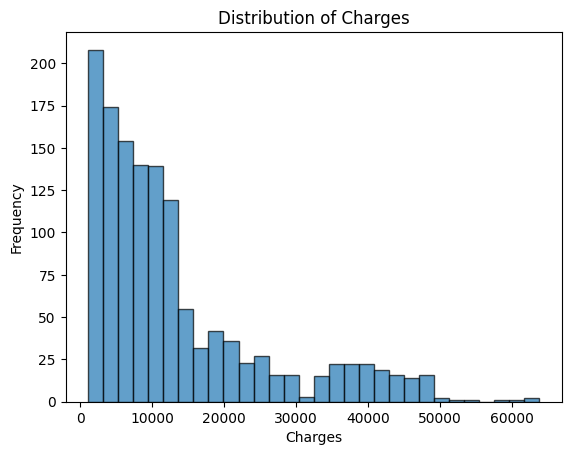

In [173]:
# Make a histogram for the target variable
plt.hist(df['charges'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

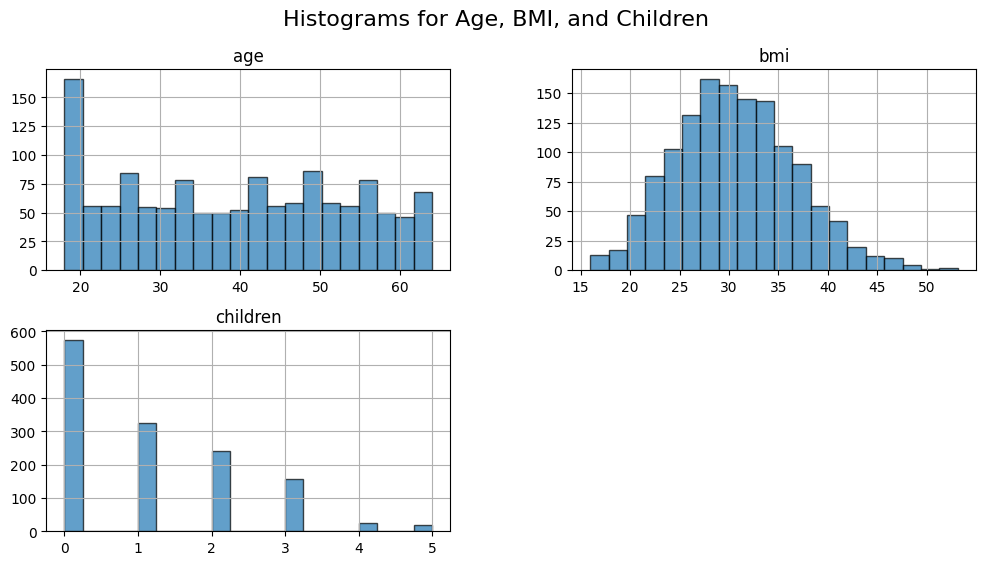

In [174]:
# Create histograms for age, bmi, and children
columns_to_plot = ['age', 'bmi', 'children']
df[columns_to_plot].hist(bins=20, figsize=(12, 6), edgecolor='k', alpha=0.7)

# Add a title to the plot
plt.suptitle('Histograms for Age, BMI, and Children', fontsize=16)
plt.show()

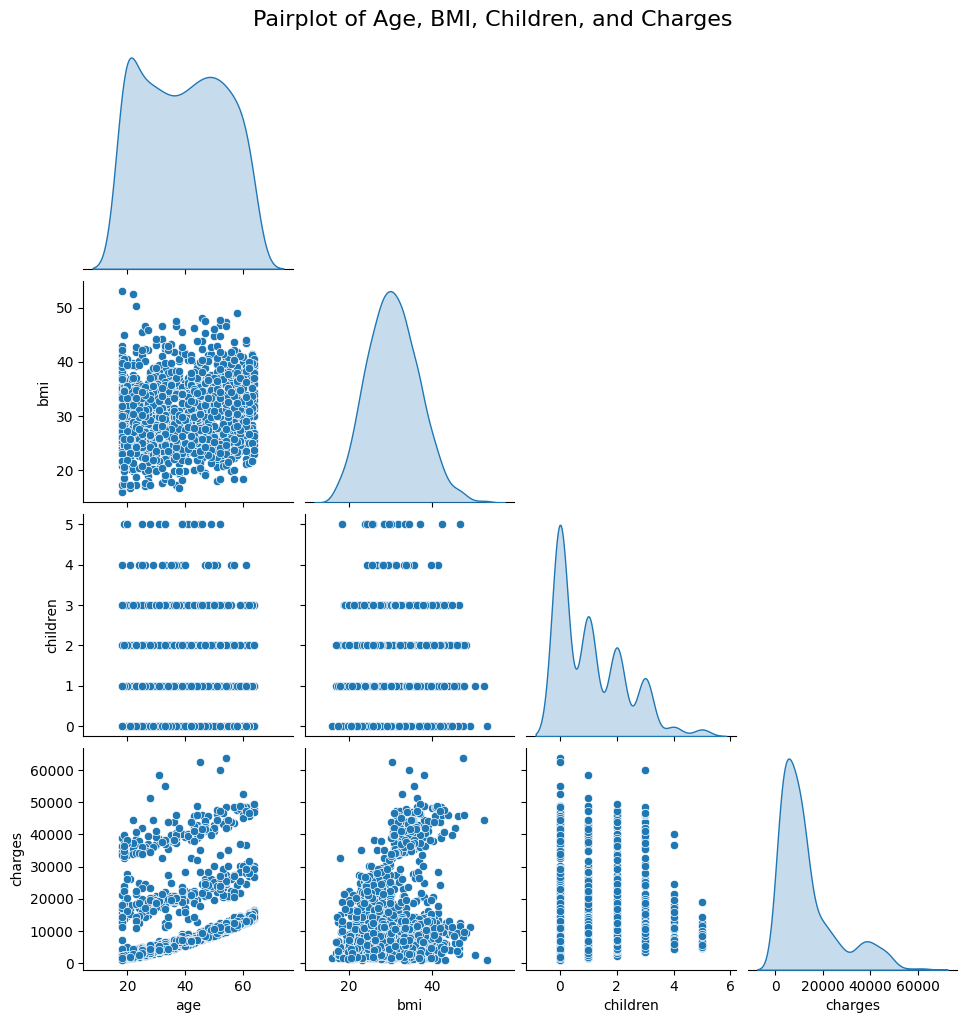

In [175]:
# Create a pairplot for the selected columns
sns.pairplot(df[['age', 'bmi', 'children', 'charges']], diag_kind='kde', corner=True)

# Add a title to the plot
plt.suptitle('Pairplot of Age, BMI, Children, and Charges', y=1.02, fontsize=16)
plt.show()

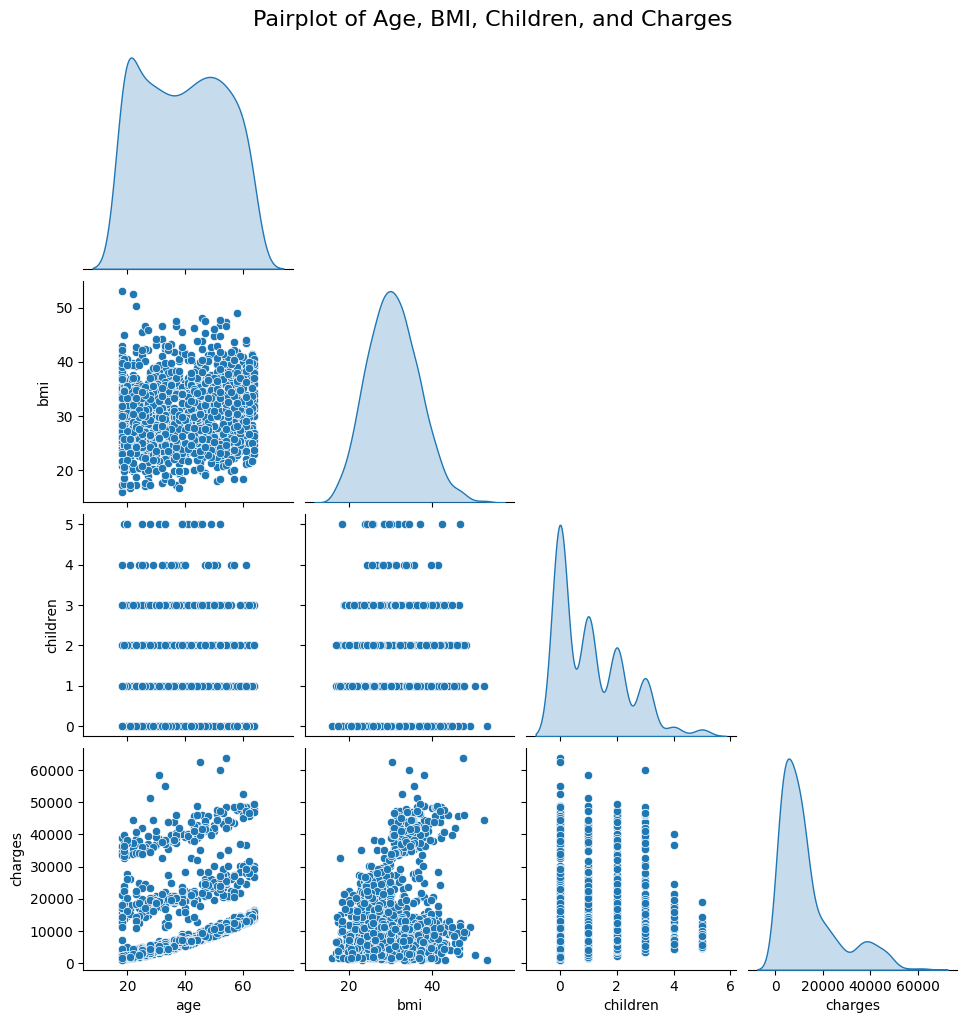

In [176]:
# Create a pairplot for the selected columns
sns.pairplot(df[['age', 'bmi', 'children', 'charges']], diag_kind='kde', corner=True)

# Add a title to the plot
plt.suptitle('Pairplot of Age, BMI, Children, and Charges', y=1.02, fontsize=16)
plt.show()

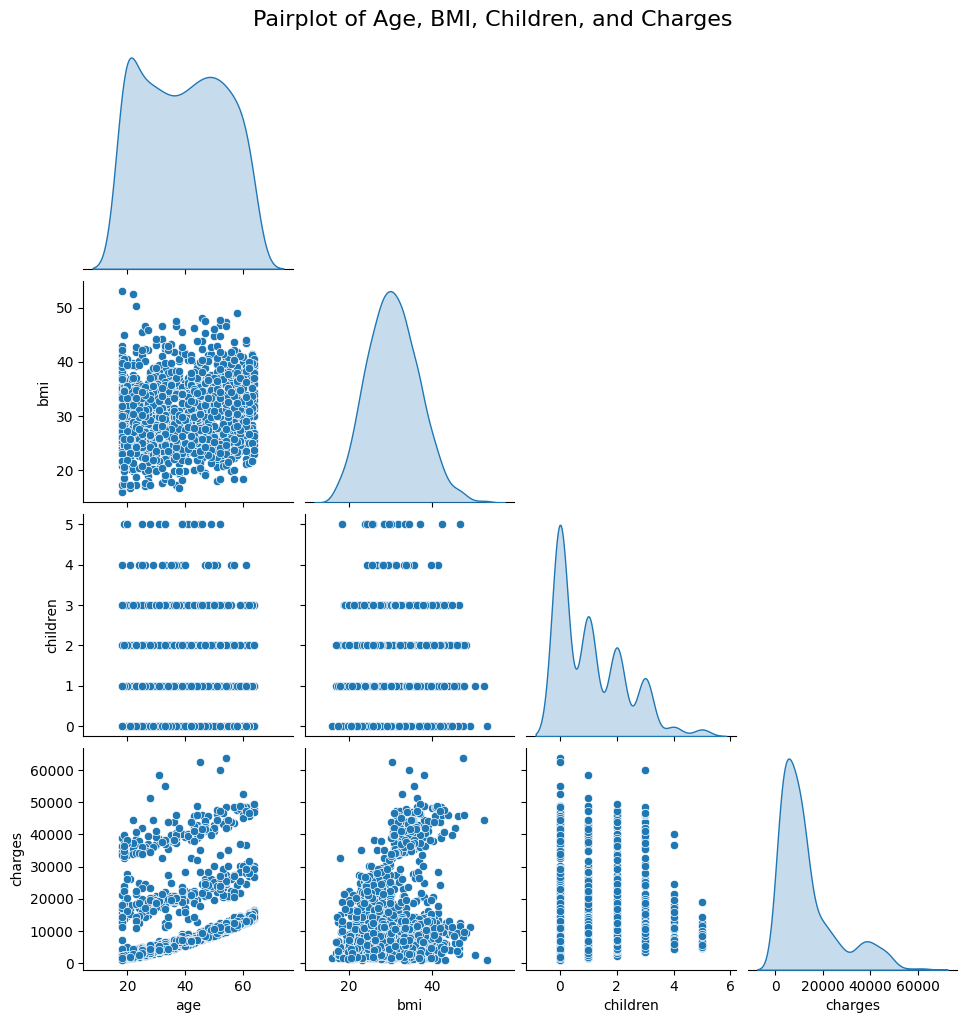

In [177]:
# Create a pairplot for the selected columns
sns.pairplot(df[['age', 'bmi', 'children', 'charges']], diag_kind='kde', corner=True)

# Add a title to the plot
plt.suptitle('Pairplot of Age, BMI, Children, and Charges', y=1.02, fontsize=16)
plt.show()

# Feature Engineering
todo
 - code sex and smoker into 0 and 1 - 1=smoker, 0=non-smoker
 - code region into 0, 1, 2, 3 - 0=southwest, 1=southeast, 2=northwest, 3=northeast
 - create bmi categories - underweight, normal, overweight, obese
 - create age categories - young_adult <30, adult, pensioner >62

In [178]:
# Define BMI categories
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

# Apply the function to create the bmi_cat column
df['bmi_cat'] = df['bmi'].apply(categorize_bmi)

# Display the first few rows to verify
df[['bmi', 'bmi_cat']].head()

,bmi,bmi_cat
0,27.900,Overweight
1,33.770,Obese
2,33.000,Obese
3,22.705,Normal
4,28.880,Overweight


In [179]:
# Define age categories
def categorize_age(age):
    if age < 30:
        return 'young_adult'
    elif 30 <= age <= 62:
        return 'adult'
    else:
        return 'pensioner'

# Apply the function to create the age_cat column
df['age_cat'] = df['age'].apply(categorize_age)

# Display the first few rows to verify
df[['age', 'age_cat']].head()

,age,age_cat
0,19,young_adult
1,18,young_adult
2,28,young_adult
3,33,adult
4,32,adult


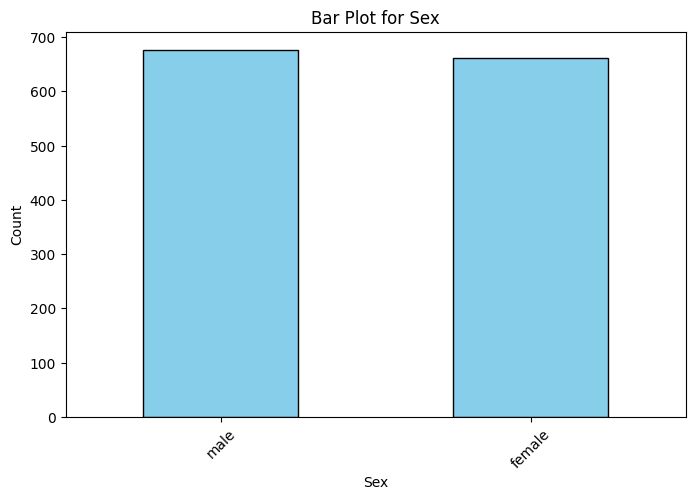

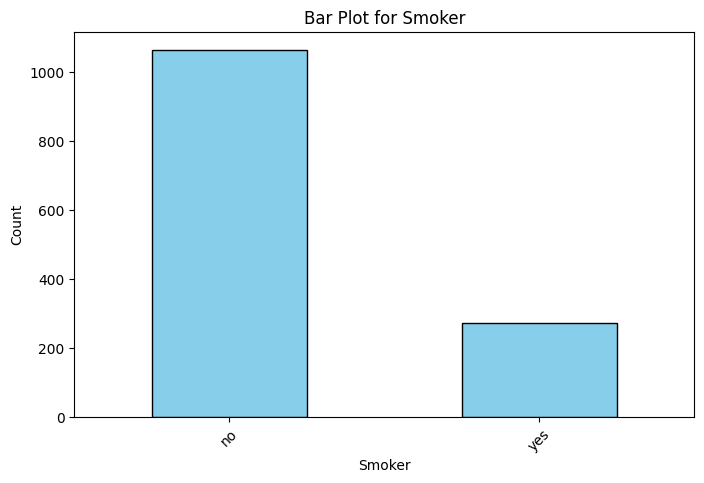

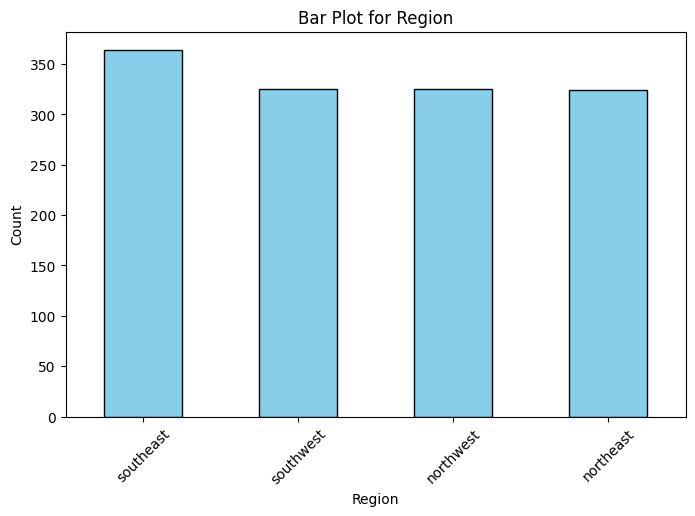

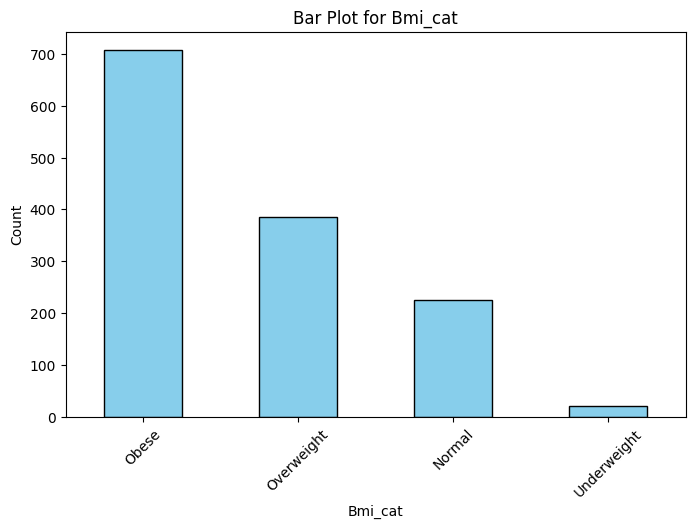

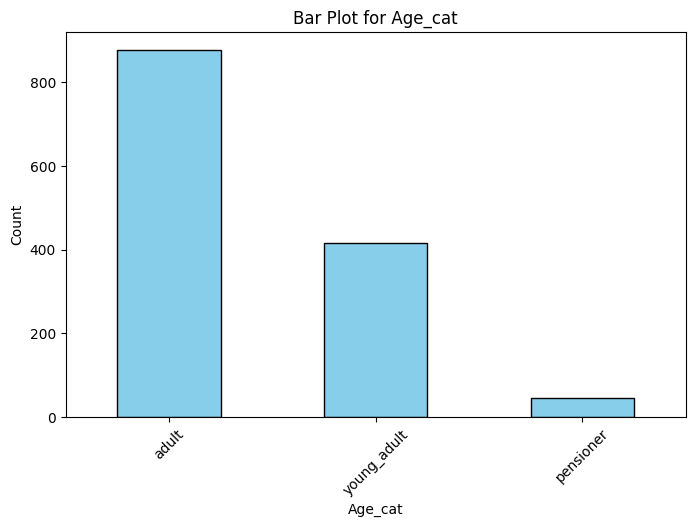

In [180]:
# Create bar plots for categorical variables
categorical_columns = ['sex', 'smoker', 'region', 'bmi_cat', 'age_cat']

for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    df[column].value_counts().plot(kind='bar', color='skyblue', edgecolor='k')
    plt.title(f'Bar Plot for {column.capitalize()}')
    plt.xlabel(column.capitalize())
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

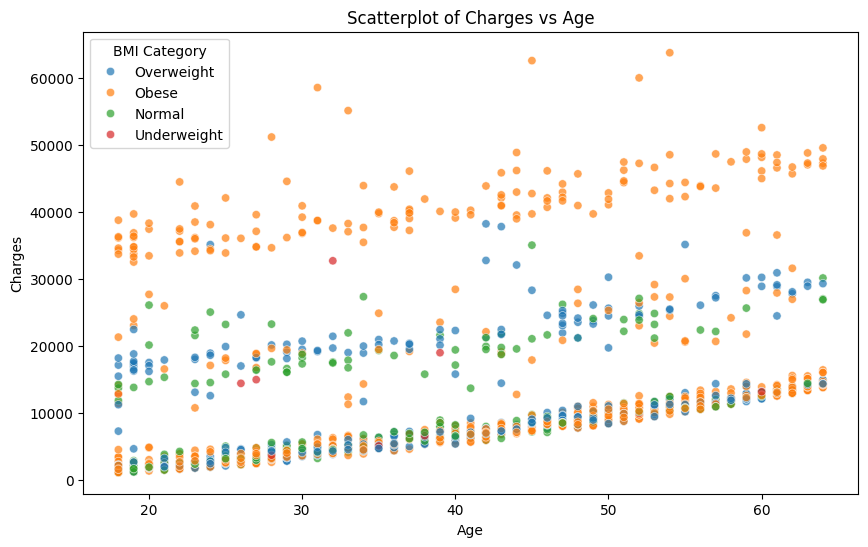

In [181]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='charges', hue='bmi_cat', alpha=0.7)
plt.title('Scatterplot of Charges vs Age')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(title='BMI Category')
plt.show()

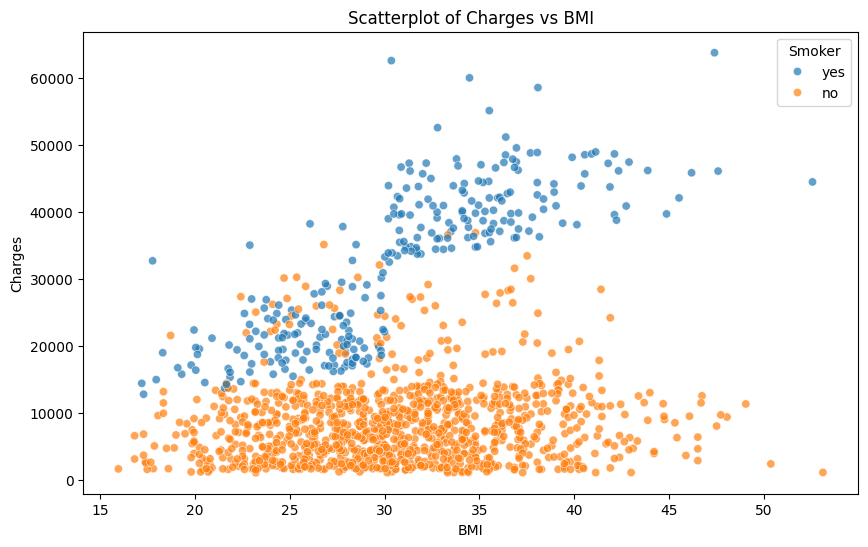

In [182]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker', alpha=0.7)
plt.title('Scatterplot of Charges vs BMI')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend(title='Smoker')
plt.show()

I find this plot to be one of the most intruiging of this dataset.  To my mind there are at least two visible groups here.  In the above imagethe smokers are certainly a separate group.  However, what is happening at 30 BMI that also increases the cost?  This is also the cutoff between overweight and obese, which makes me think that there is more to this than just two groups.  It is beginning to become apparent that obesity and smoking are two key factors in increasing medical costs.

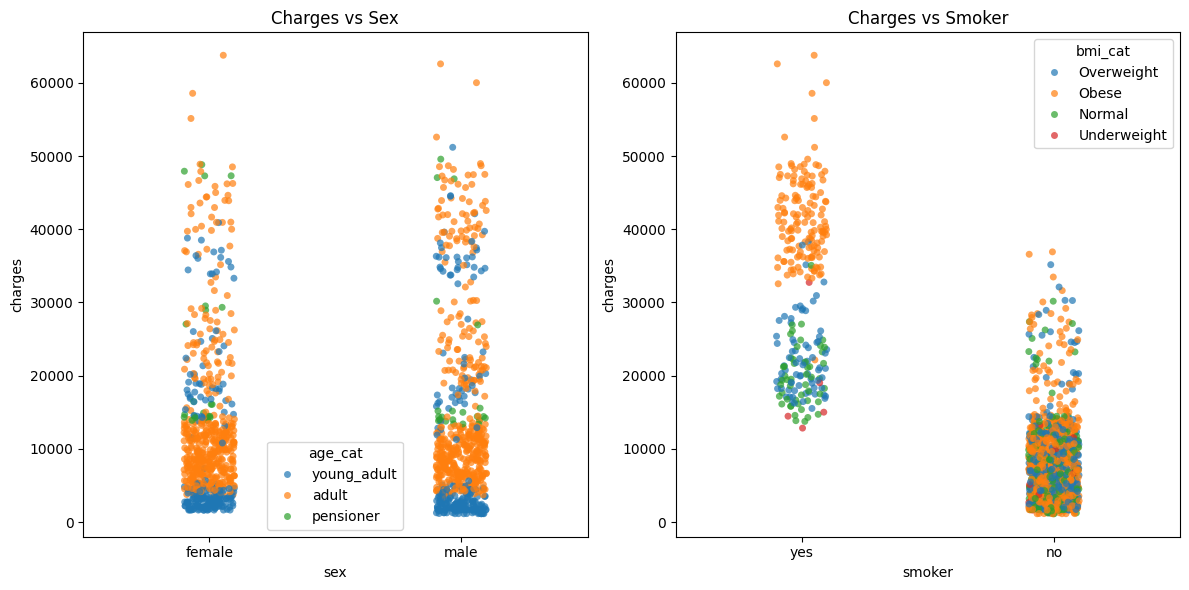

In [183]:
# Strip plot for charges vs sex
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.stripplot(data=df, x='sex', y='charges', jitter=True, hue='age_cat', alpha=0.7)
plt.title('Charges vs Sex')

# Strip plot for charges vs smoker
plt.subplot(1, 2, 2)
sns.stripplot(data=df, x='smoker', y='charges', jitter=True, hue='bmi_cat' ,alpha=0.7)
plt.title('Charges vs Smoker')

plt.tight_layout()
plt.show()

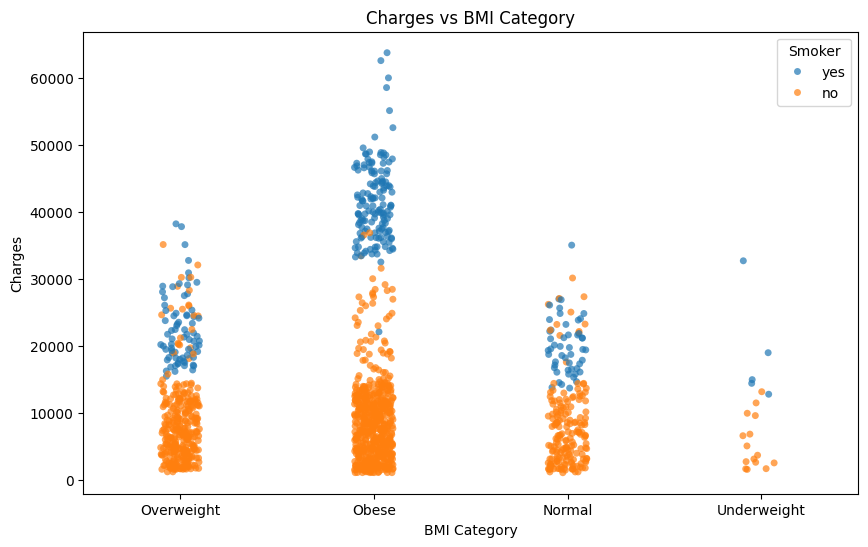

In [184]:
plt.figure(figsize=(10, 6))
sns.stripplot(data=df, x='bmi_cat', y='charges', hue='smoker', jitter=True, alpha=0.7)
plt.title('Charges vs BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Charges')
plt.legend(title='Smoker')
plt.show()

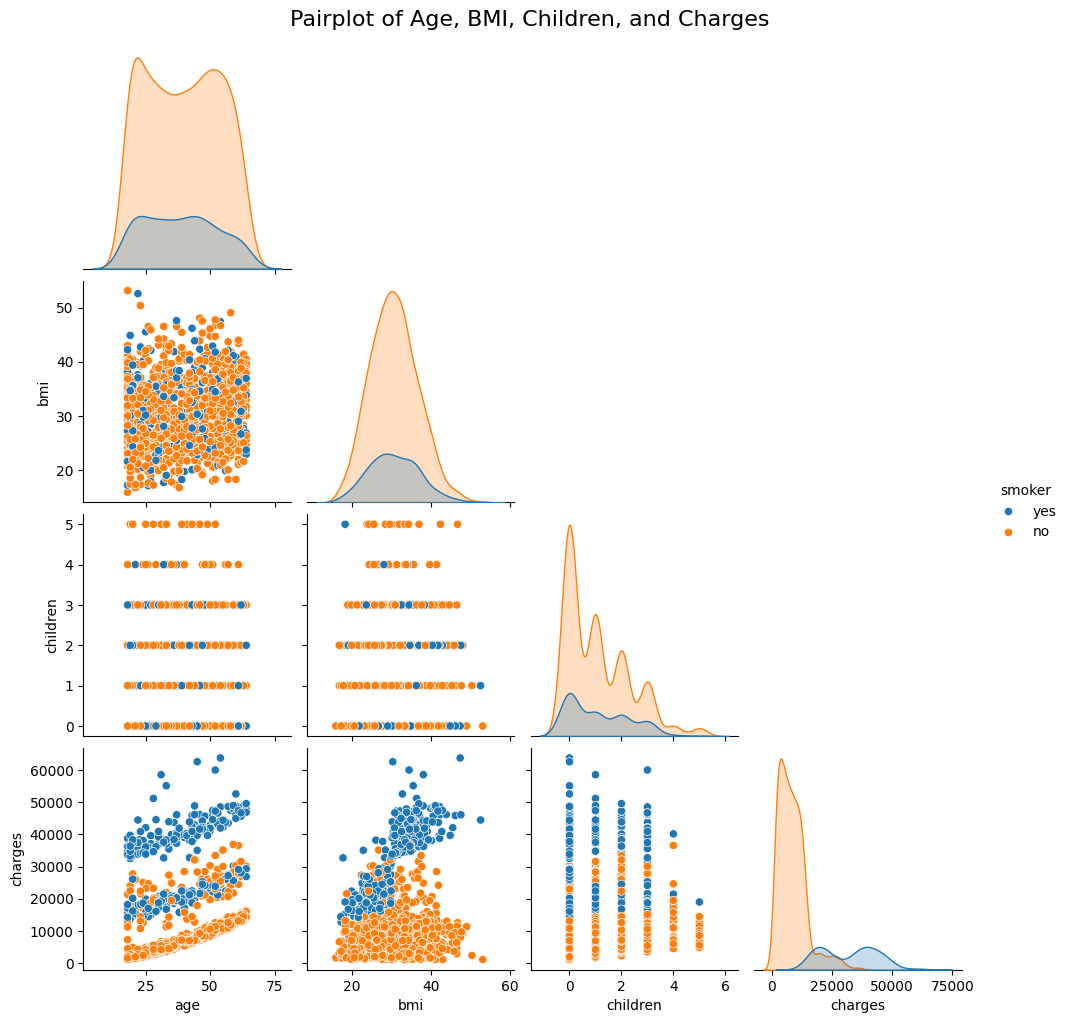

In [185]:
# Create a pairplot for the selected columns
sns.pairplot(df, hue='smoker', diag_kind='kde', corner=True)

# Add a title to the plot
plt.suptitle('Pairplot of Age, BMI, Children, and Charges', y=1.02, fontsize=16)
plt.show()

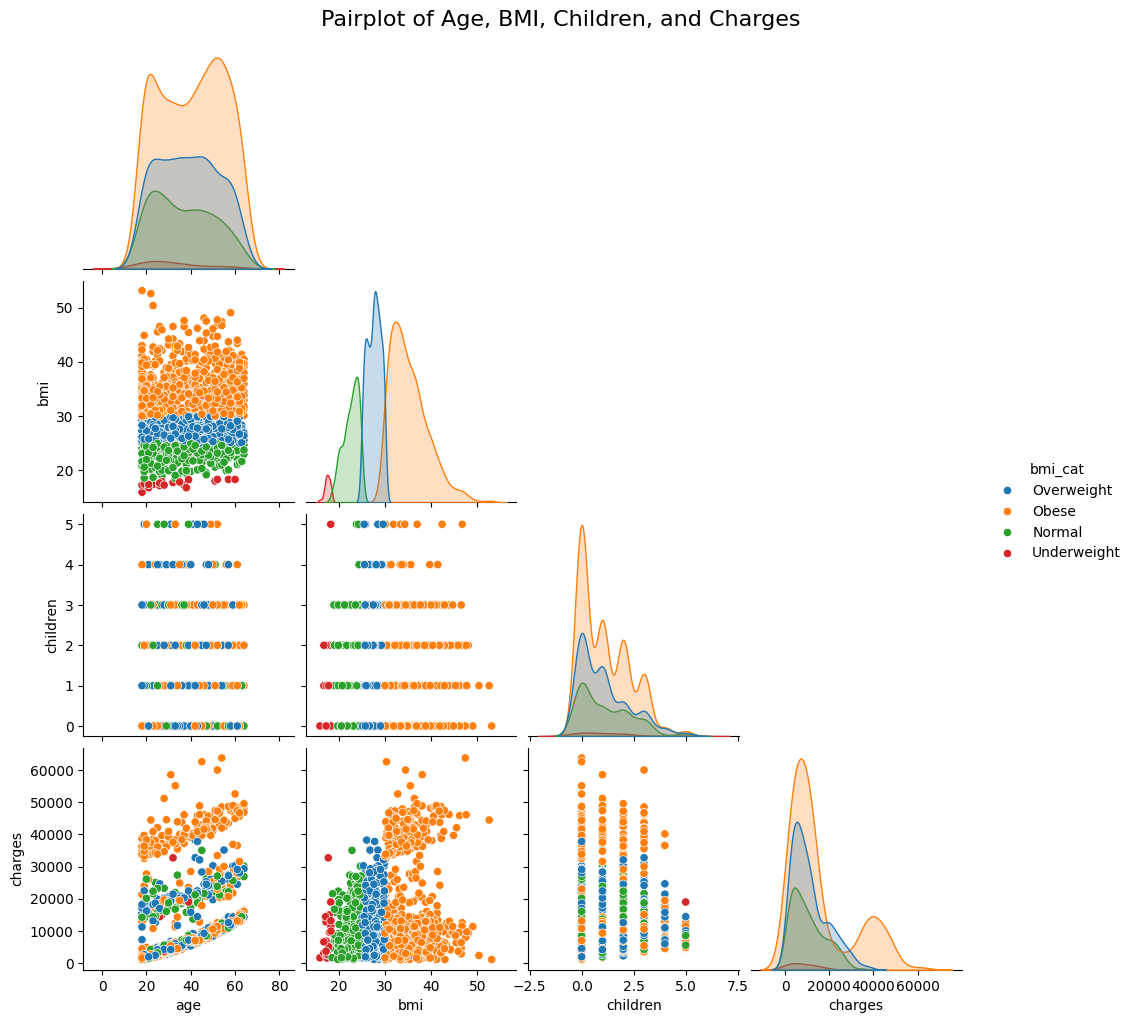

In [186]:
# Create a pairplot for the selected columns
sns.pairplot(df, hue='bmi_cat', diag_kind='kde', corner=True)

# Add a title to the plot
plt.suptitle('Pairplot of Age, BMI, Children, and Charges', y=1.02, fontsize=16)
plt.show()

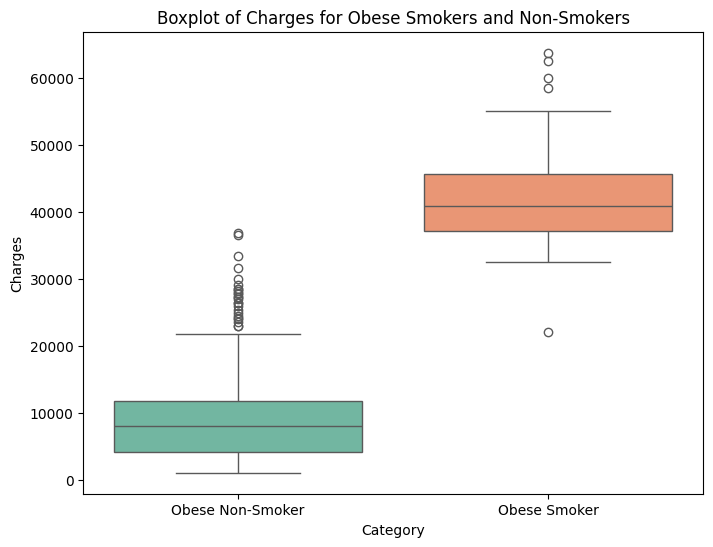

In [187]:
# Filter the dataframe for obese individuals
obese_df = df[df['bmi_cat'] == 'Obese'].copy()  

# Create a new column to categorize obese individuals as smokers or non-smokers
obese_df.loc[:, 'smoker_status'] = obese_df['smoker'].apply(lambda x: 'Obese Smoker' if x == 'yes' else 'Obese Non-Smoker')

# Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=obese_df, x='smoker_status', y='charges', hue='smoker', palette='Set2', dodge=False, legend=False)
plt.title('Boxplot of Charges for Obese Smokers and Non-Smokers')
plt.xlabel('Category')
plt.ylabel('Charges')
plt.show()

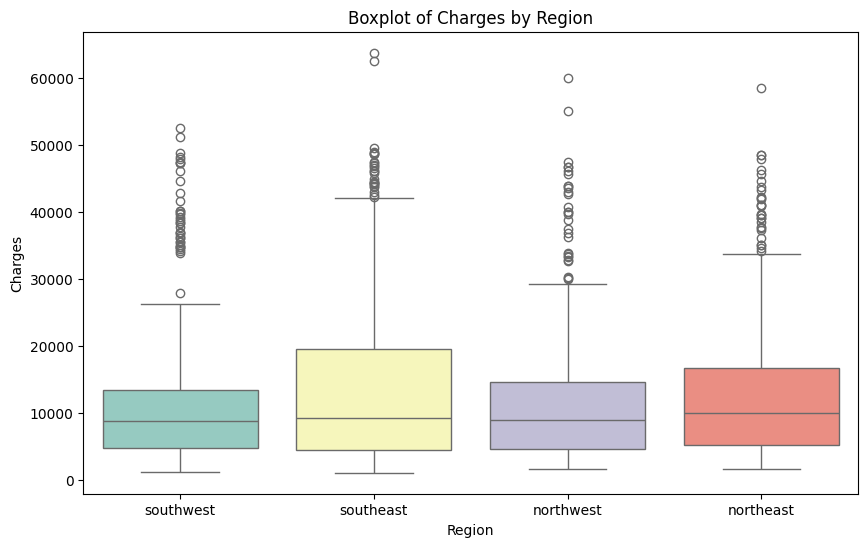

In [188]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='region', y='charges', hue='region', palette='Set3', dodge=False, legend=False)
plt.title('Boxplot of Charges by Region')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()

# Data Preprocessing
todo
 - scale the data
 - one hot encode the categorical data
 - split data into training and testing sets


In [189]:
# define the categorical columns
categorical_columns = ['sex', 'smoker', 'region', 'bmi_cat', 'age_cat']

# One-hot encode the categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True, prefix='ohe', prefix_sep='_', dtype='int8')

# Rename the specified columns in df_encoded
df_encoded.rename(columns={
    'ohe_yes': 'ohe_smoker',
    'ohe_Obese': 'ohe_obese',
    'ohe_Overweight': 'ohe_overweight',
    'ohe_Underweight': 'ohe_underweight'
}, inplace=True)

# drop the original age and bmi columns
df_encoded = df_encoded.drop(columns=['age', 'bmi'])

# Display the first few rows of the encoded dataframe
df_encoded.head()


,children,charges,ohe_male,ohe_smoker,ohe_northwest,ohe_southeast,ohe_southwest,ohe_obese,ohe_overweight,ohe_underweight,ohe_pensioner,ohe_young_adult
0,0,16884.92400,0,1,0,0,1,0,1,0,0,1
1,1,1725.55230,1,0,0,1,0,1,0,0,0,1
2,3,4449.46200,1,0,0,1,0,1,0,0,0,1
3,0,21984.47061,1,0,1,0,0,0,0,0,0,0
4,0,3866.85520,1,0,1,0,0,0,1,0,0,0


In [190]:
# transform charges to account for right skew
df_encoded['charges'] = np.log1p(df_encoded['charges'])

In [191]:
# define the features and target variable
X = df_encoded.drop(columns='charges')
y = df_encoded['charges']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=dont_panic)

# Clustering
I know that this is a regression project; however, I am curios about clustering here

# Regression

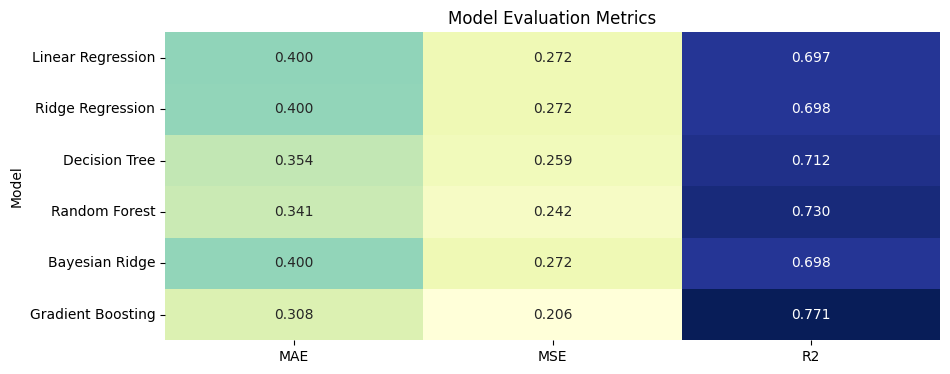

In [ ]:
# Function to evaluate models
def evaluate_models(models, X_train, y_train, X_test, y_test):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        results[name] = {
            'MAE': mean_absolute_error(y_test, y_pred),
            'MSE': mean_squared_error(y_test, y_pred),
            'R2': r2_score(y_test, y_pred)
        }
    return results

# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Bayesian Ridge': BayesianRidge(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Evaluate the models
results = evaluate_models(models, X_train, y_train, X_test, y_test)

# Convert the results dictionary into a dataframe
results_df = pd.DataFrame.from_dict(results, orient='index').reset_index()

# Rename the columns for clarity
results_df.columns = ['Model', 'MAE', 'MSE', 'R2']

# Display the dataframe as a seaborn heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(results_df.set_index('Model'), annot=True, fmt=".3f", cmap="YlGnBu", cbar=False)
plt.title('Model Evaluation Metrics')
plt.show()